In [8]:
import os
import librosa

# Specify the folder path where the audio files are located
folder_path = "/content/drive/MyDrive/Btraining_murmur"

# Get the list of audio files in the folder
audio_files = os.listdir(folder_path)

# Initialize variables for maximum, minimum, and total length
max_length = float("-inf")
min_length = float("inf")
total_length = 0

# Loop through each audio file in the folder
for file in audio_files:
    # Load the audio file
    file_path = os.path.join(folder_path, file)
    y, sr = librosa.load(file_path, sr=None)

    # Extract the length of the audio file in seconds
    length = librosa.get_duration(y=y, sr=sr)

    # Update maximum and minimum lengths
    max_length = max(max_length, length)
    min_length = min(min_length, length)

    # Update total length
    total_length += length

# Calculate the average length
avg_length = total_length / len(audio_files)

# Display the results
print("Maximum length: {:.2f} seconds".format(max_length))
print("Minimum length: {:.2f} seconds".format(min_length))
print("Average length: {:.2f} seconds".format(avg_length))


Maximum length: 24.16 seconds
Minimum length: 0.86 seconds
Average length: 7.66 seconds


In [15]:
import os
import fnmatch
from sklearn import svm
from sklearn.model_selection import train_test_split
import librosa
import numpy as np
import pandas as pd
from librosa import display

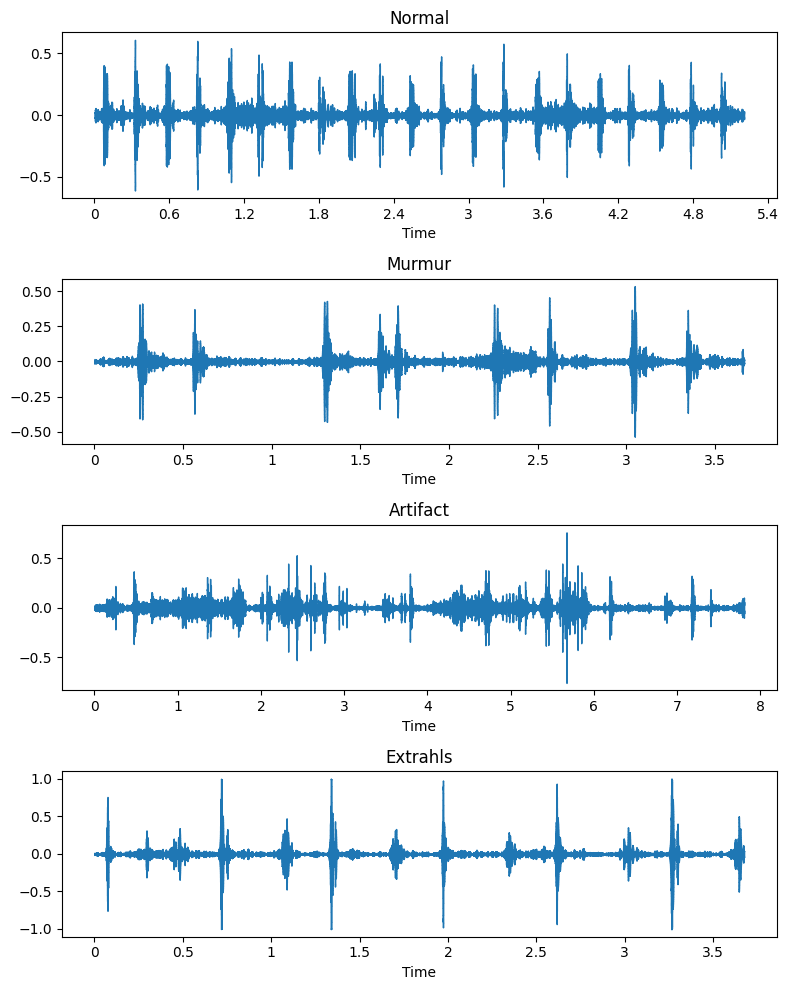

In [16]:
import librosa.display
import matplotlib.pyplot as plt


plt.figure(figsize = (8, 10))
plt.subplot(4,1,1)
sampledata, sampling_rate = librosa.load('/content/drive/MyDrive/Btraining_normal/103_1305031931979_B.wav', sr=44100, offset = 1 )
librosa.display.waveshow(sampledata, sr=sampling_rate)
plt.title('Normal')

plt.subplot(4,1,2)
sampledata, sampling_rate = librosa.load('/content/drive/MyDrive/Btraining_murmur/112_1306243000964_A.wav', sr=44100, offset = 1 )
librosa.display.waveshow(sampledata, sr=sampling_rate)
plt.title('Murmur')

plt.subplot(4,1,3)
sampledata, sampling_rate = librosa.load('/content/drive/MyDrive/Btraining_artifact/101_1305030823364_B.wav', sr=44100, offset = 1 )
librosa.display.waveshow(sampledata, sr=sampling_rate)
plt.title('Artifact')

plt.subplot(4,1,4)
sampledata, sampling_rate = librosa.load('/content/drive/MyDrive/Btraining_extrahls/127_1306764300147_C2.wav', sr=44100, offset = 1 )
librosa.display.waveshow(sampledata, sr=sampling_rate)
plt.title('Extrahls')

plt.tight_layout()

In [10]:
def extract_feature(file_name):
  X, sample_rate = librosa.load(file_name)
  # STFT
  stft = np.abs(librosa.stft(X))
  # MFCCS
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
  # Chroma
  chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
  # contrast
  contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
  # tonnetz
  tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
  # Combining all the features
  arrays_sound = np.hstack((mfccs, chroma,contrast,tonnetz))
  
  return arrays_sound.reshape([-1, 1])

In [11]:
def decodeFolder(category):
  print("Starting decoding folder "+category+" ...")
  listOfFiles = os.listdir(category)
  listOfFiles = fnmatch.filter(listOfFiles, '*.wav')
  arrays_sound = []
  for file in listOfFiles:
    filename = os.path.join(category,file)
    features_sound = extract_feature(filename)
    arrays_sound.append(features_sound)
  return arrays_sound

In [13]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [17]:
normal_soundsB = decodeFolder("Btraining_normal")
murmur_soundsB = decodeFolder("Btraining_murmur")
artifact_soundsB = decodeFolder("Btraining_artifact")
extrahls_soundsB = decodeFolder("Btraining_extrahls")

Starting decoding folder Btraining_normal ...


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=868
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=712
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=820
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=513
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=610
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=953
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWar

Starting decoding folder Btraining_murmur ...


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=964
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=296
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=771
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=961
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=939
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWar

Starting decoding folder Btraining_artifact ...


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=924
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=462
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=1002
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=967
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=628
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=563
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWa

Starting decoding folder Btraining_extrahls ...


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=825
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=980
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=861
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=696
  warnings.warn(


In [84]:
normal_labelsB = [0 for items in normal_soundsB]
murmur_labelsB = [1 for items in murmur_soundsB]
artifact_labelsB = [2 for items in artifact_soundsB]
extrahls_labelsB = [3 for items in extrahls_soundsB]

In [46]:
train_sounds = np.concatenate((normal_soundsB, murmur_soundsB, artifact_soundsB, extrahls_soundsB))
train_labels = np.concatenate((normal_labelsB, murmur_labelsB, artifact_labelsB, extrahls_labelsB))

In [85]:
train_labels.shape

(461,)

In [86]:
train_sounds = np.reshape(train_sounds, (461, 65))
# train_labels = np.reshape(train_labels, (461, 65))
X = train_sounds
y = train_labels
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13)

In [88]:
clf =svm.SVC()
clf.fit(train_sounds, train_labels)
print("training done")
predict = clf.predict(X_test)
print(predict)
print(y_test)

training done
[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2]
[2 0 1 2 2 2 0 0 3 2 2 2 0 0 0 1 2 0 0 0 2 0 2 0 0 2 0 0 2 0 1 0 0 2 1 0 2
 0 2 2 2 2 2 0 2 0 0 2 2 0 0 3 3 3 1 0 0 0 0 2 1 0 0 2 0 0 0 0 1 1 0 0 0 2
 0 0 3 0 0 0 2 1 2 0 1 0 0 0 0 2 0 0 2]


In [89]:
X_train.shape, y_train.shape

((368, 65), (368,))

In [93]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 5)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
print("\n The best parameters:\n",grid.best_estimator_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.419 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.405 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.405 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.411 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.411 total time=   0.0s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.419 total time=   0.0s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.405 total time=   0.0s
[CV 3/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.405 total time=   0.0s
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.411 total time=   0.0s
[CV 5/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.411 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.419 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=0.01, kernel=rbf

In [94]:
predict = grid.predict(X_test)
print(predict)

[0 0 2 2 2 2 0 0 2 0 2 2 0 0 0 1 2 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 2 0 0 2
 0 2 2 2 2 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 2 2 2 0 1 0 0 0 0 0 0 0 1]


In [95]:
from sklearn.metrics import confusion_matrix, classification_report
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predict))

=== Confusion Matrix ===
[[48  0  1  0]
 [ 5  3  2  0]
 [ 6  1 22  0]
 [ 4  0  1  0]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.98      0.86        49
           1       0.75      0.30      0.43        10
           2       0.85      0.76      0.80        29
           3       0.00      0.00      0.00         5

    accuracy                           0.78        93
   macro avg       0.59      0.51      0.52        93
weighted avg       0.75      0.78      0.75        93



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


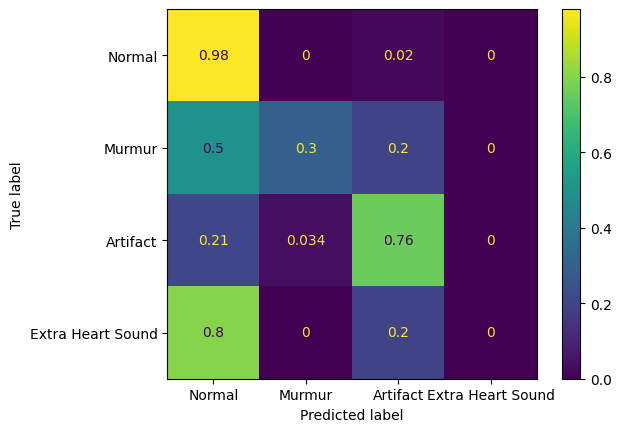

In [83]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predict,  normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Normal', 'Murmur', 'Artifact', 'Extra Heart Sound'])
cm_display.plot()
plt.show()

In [96]:
import numpy as np

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.utils import np_utils
from sklearn import metrics 

print('Build LSTM RNN model ...')

Build LSTM RNN model ...


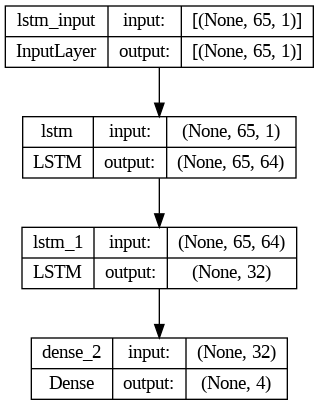

In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
dropout_ = 0.05
recurrent_dropout_ = 0.05
# Create a sequential model
model = Sequential()
model.add(LSTM(units=64, dropout=dropout_, recurrent_dropout=recurrent_dropout_, return_sequences=True,input_shape = (65,1)))
model.add(LSTM(units=32, dropout=dropout_, recurrent_dropout=recurrent_dropout_, return_sequences=False))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True)